In [1]:
%load_ext lab_black

# GMM

In [2]:
import os

os.chdir("../..")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from utils.read_final_data import read_train_test_data
from utils.visualisation import (
    get_metrics_of_model,
    plot_clustering,
    plot_clustering_from_clusters,
)
from models.metrics import metrics_list
import pickle as pkl

In [4]:
X_train, X_test = read_train_test_data()
df_train, df_test = (
    pd.read_pickle("resources/data/train_data.pkl"),
    pd.read_pickle("resources/data/test_data.pkl"),
)
train_clusters = df_train.label
test_clusters = df_test.label

In [9]:
gmm = GaussianMixture(n_components=5, covariance_type="full", random_state=7456)

plot_clustering(gmm, X_train, X_test)

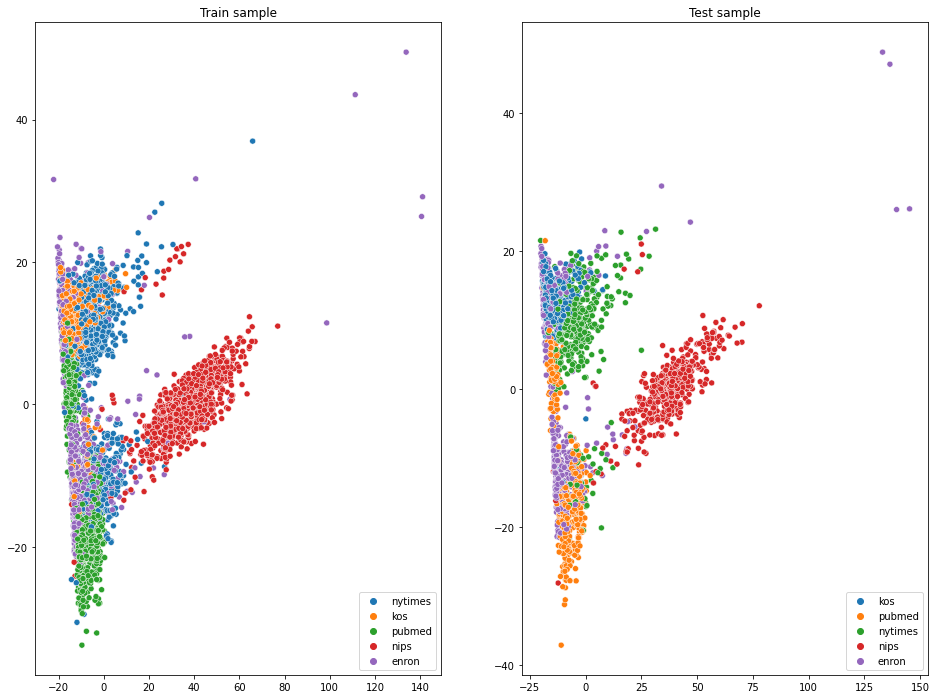

In [6]:
plot_clustering_from_clusters(X_train, X_test, train_clusters, test_clusters)

In [10]:
gmm.fit(X_train)
df_train = df_train.assign(pred=gmm.predict(X_train))
df_test = df_test.assign(pred=gmm.predict(X_test))


def get_cluster_summary(df):
    summary = pd.pivot(
        data=df.groupby(["label", "pred"], as_index=False).size(),
        index="pred",
        columns="label",
    ).fillna(0)
    return summary.div(summary.values.sum(axis=1), axis=0)


get_cluster_summary(df_train)

size                                        
label     enron       kos      nips   nytimes    pubmed
pred                                                   
0      0.496662  0.078772  0.012016  0.080107  0.332443
1      0.168582  0.042146  0.026820  0.030651  0.731801
2      0.000000  0.000000  1.000000  0.000000  0.000000
3      0.193305  0.332458  0.002297  0.317033  0.154906
4      0.048140  0.000000  0.912473  0.039387  0.000000

In [11]:
get_cluster_summary(df_test)

size                                        
label     enron       kos      nips   nytimes    pubmed
pred                                                   
0      0.573991  0.017937  0.004484  0.058296  0.345291
1      0.056738  0.000000  0.021277  0.007092  0.914894
2      0.000000  0.000000  0.972318  0.000000  0.027682
3      0.213094  0.280488  0.051348  0.275995  0.179076
4      0.021505  0.000000  0.935484  0.000000  0.043011